# **Understanding the Overall Concept of Classification through Decision Tree Implementation**

### 1. Prepation of dataset
### 2. Download dataset, create dataframe, split data
### 3. Prediction
### 4. Visualization
### 5. Implementation of **SVM**
### 6.Implementation of **Logistic Regression**

Reference：
- <https://qiita.com/ao_log/items/fe9bd42fd249c2a7ee7a>
- <https://qiita.com/sugulu_Ogawa_ISID/items/c0e8a5e6b177bfe05e99#21-%E5%91%BD%E5%90%8D%E6%96%B9%E6%B3%952reverse-notation%E9%80%86%E8%A8%98%E6%B3%95%E3%81%A7%E5%91%BD%E5%90%8D%E3%81%97%E8%AA%AD%E3%81%BF%E5%8F%96%E3%82%8A%E3%82%84%E3%81%99%E3%81%8F%E3%81%99%E3%82%8B>

## **(1) Import modules, Preparation of dataset**


In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


%matplotlib inline



### Type of Features

|  columns  |  JP name |
| ---- | ---- |
|  petal length (cm)  |  花びらの長さ  |
|  petal width (cm) | 花びらの幅  |
|  sepal length (cm)  |  がく片の長さ  |
|  sepal width (cm)  |  がく片の幅  |

### Type of targets（Iris）
- 0：setosa
- 1：versicolor
- 2：virginica

## **(2) Download dataset, create dataframe, split data**



In [57]:
# Download dataset, create dataframe, split data
dataset = load_iris()
columns_name = dataset.feature_names
x = dataset.data
t = dataset.target
df = pd.DataFrame(data=x, columns=columns_name)
df['Target'] = t
display(df.head(5))

print(type(dataset))
print(f"Type of targets are:{dataset.target_names}")
print(np.unique(t))
print(x.shape, t.shape)
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<class 'sklearn.utils._bunch.Bunch'>
Type of targets are:['setosa' 'versicolor' 'virginica']
[0 1 2]
(150, 4) (150,)


## **(3) Prediction**


In [58]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train, t_train)
print('train score : ', dtree.score(x_train, t_train))
print('test score : ', dtree.score(x_test, t_test)) # 1.0 (test_size=0.2)


train score :  1.0
test score :  0.9777777777777777


In [59]:
dtree.predict(x_test)
print(dtree.predict(x_test)==t_test)
print(dtree.predict(x_test))
print(t_test)
print(len(t_test))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
45


## **(4) Visualization**

Visualization reference：<https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html>

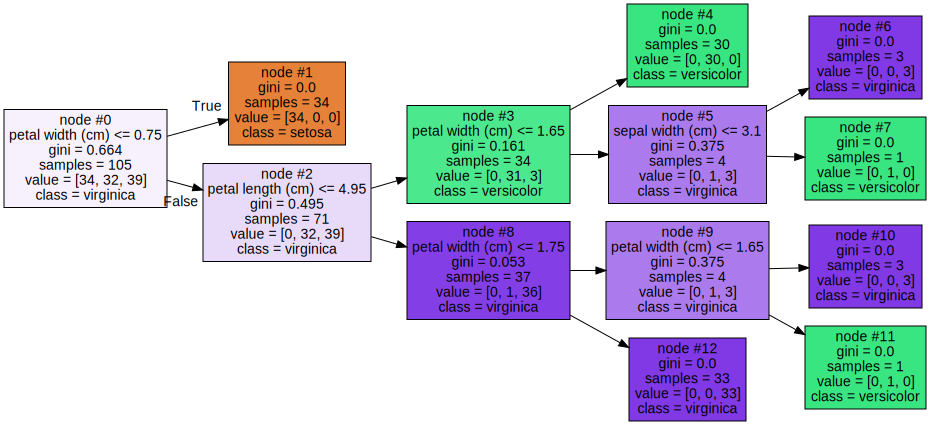

In [92]:
dot_data = export_graphviz(dtree,\
    filled=True,rounded=False,node_ids=True,rotate=True,feature_names=dataset.feature_names,class_names=dataset.target_names)


graph_tree = graphviz.Source(dot_data)
graph_tree


[0.         0.02150464 0.39766951 0.58082584]


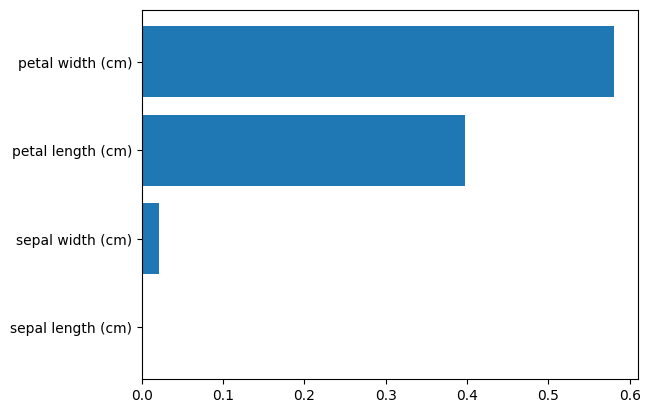

In [61]:
feature_importance = dtree.feature_importances_
print(feature_importance)

y = columns_name
width = feature_importance

plt.barh(y=y, width=width);

## **(5) Implementation of SVC**
- In general, SVM needs **data standardization**

In [62]:
svc = SVC()
svc.fit(x_train, t_train)
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

train score :  0.9714285714285714
test score :  0.9777777777777777


reference:<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [63]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)
print(std_scaler.mean_)
print(std_scaler.var_)

print(round(x_train_std.mean()))
print(round(x_train_std.std()))

[5.89333333 3.0447619  3.82857143 1.22761905]
[0.7615746  0.19294875 3.22546939 0.602761  ]
0
1


In [64]:
svc_std = SVC()
svc_std.fit(x_train_std, t_train)

print('train score scaling : ', svc_std.score(x_train_std, t_train))
print('test score scaling : ', svc_std.score(x_test_std, t_test))

train score scaling :  0.9714285714285714
test score scaling :  0.9777777777777777


## **(6) Implementation of Logistic Regression**
- L2 regularization(C is the parameter)

In [70]:
log_reg = LogisticRegression(C=1.0)
log_reg.fit(x_train, t_train)
print('train score : ', log_reg.score(x_train, t_train))
print('test score : ', log_reg.score(x_test, t_test)) # over-fitting (test_size=0.2)

train score :  0.9809523809523809
test score :  0.9777777777777777


In [71]:
print(log_reg.coef_.shape)
print(log_reg.coef_)
print(log_reg.intercept_)


(3, 4)
[[-0.39783961  0.83360655 -2.28957943 -0.97852276]
 [ 0.54462603 -0.29016523 -0.23266966 -0.65809245]
 [-0.14678642 -0.54344132  2.52224909  1.63661521]]
[  9.00084685   1.54172321 -10.54257007]


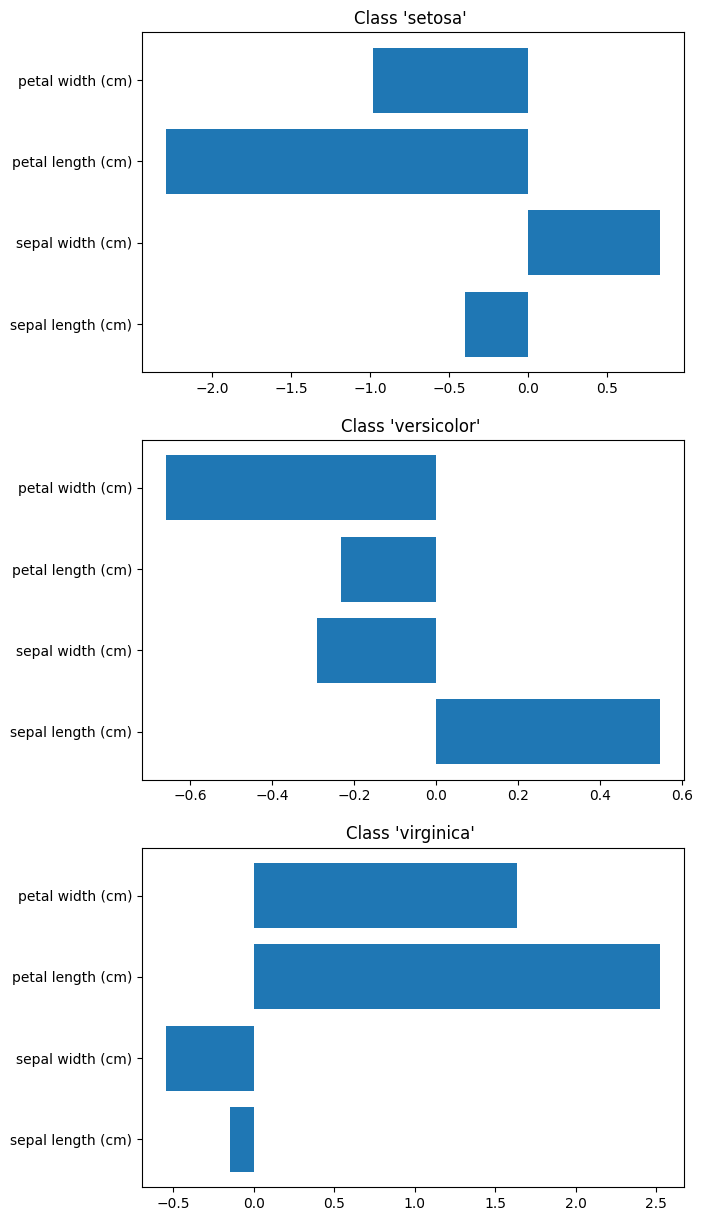

In [80]:
# Feature importance
fig = plt.figure(figsize=(7, 15))

for i in range(len(log_reg.coef_)):
    ax = fig.add_subplot(3, 1, i+1)
    ax.barh(y=dataset.feature_names, width=log_reg.coef_[i])
    ax.set_title(f"Class '{dataset.target_names[i]}' ")

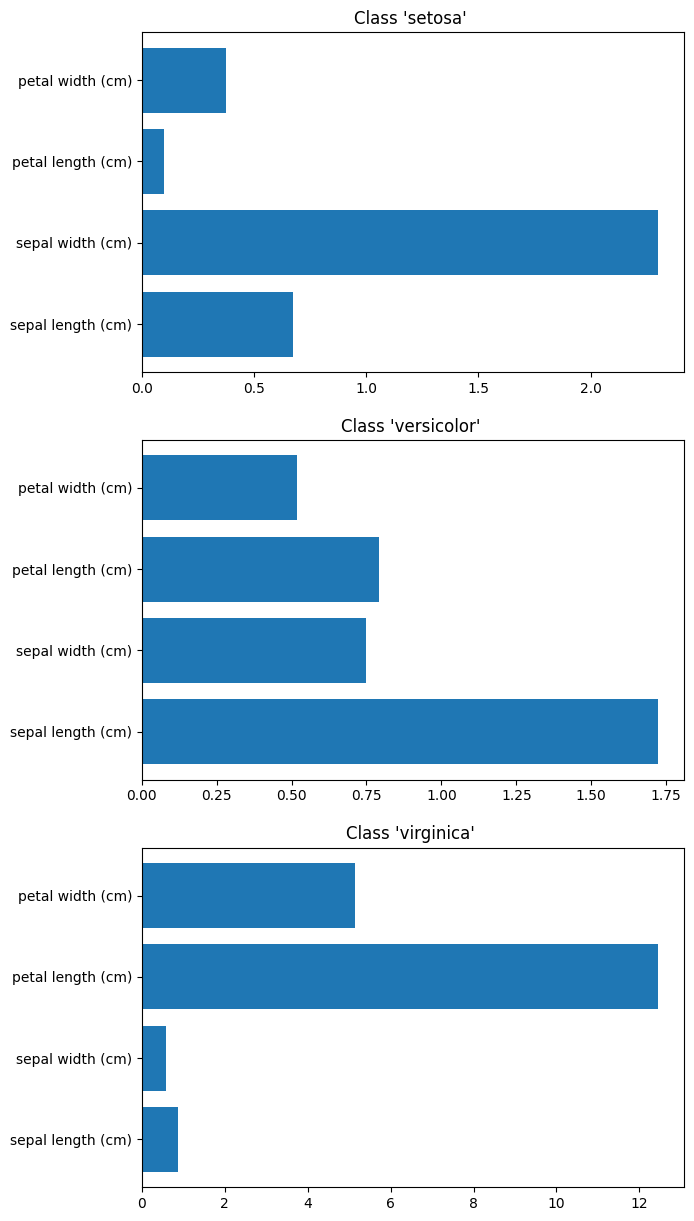

In [82]:
# Odds ratio
fig = plt.figure(figsize=(7, 15))

for i in range(len(log_reg.coef_)):
    ax = fig.add_subplot(3, 1, i+1)
    odds_ratio = np.exp(log_reg.coef_[i])
    ax.barh(y=dataset.feature_names, width=odds_ratio)
    ax.set_title(f"Class '{dataset.target_names[i]}' ")

In [85]:
print('Feature names',dataset.feature_names)
print('Weights(Coefficients):',log_reg.coef_[0])
print('Odds Ratio:',  np.exp(log_reg.coef_[0]))


Feature names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Weights(Coefficients): [-0.39783961  0.83360655 -2.28957943 -0.97852276]
Odds Ratio: [0.67176976 2.30160465 0.10130906 0.37586593]


In [88]:
df = pd.DataFrame({'Feature names': dataset.feature_names, 'Weights(Coefficients)': log_reg.coef_[0], 'Odds Ratio': np.exp(log_reg.coef_[0])})
df

,Feature names,Weights(Coefficients),Odds Ratio
0,sepal length (cm),-0.397840,0.671770
1,sepal width (cm),0.833607,2.301605
2,petal length (cm),-2.289579,0.101309
3,petal width (cm),-0.978523,0.375866


In [91]:
# An example of prediction
print(log_reg.predict([x_test[0]]))
print(log_reg.predict_proba([x_test[0]]))


[2]
[[1.31633381e-04 5.98687064e-02 9.39999660e-01]]
